## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.sgd(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 558s 11ms/step - loss: 2.2775 - accuracy: 0.1530 - val_loss: 2.2303 - val_accuracy: 0.1875
Epoch 2/500
50000/50000 [==============================] - 389s 8ms/step - loss: 2.1951 - accuracy: 0.2103 - val_loss: 2.1664 - val_accuracy: 0.2353
Epoch 3/500
50000/50000 [==============================] - 12s 247us/step - loss: 2.1387 - accuracy: 0.2435 - val_loss: 2.1171 - val_accuracy: 0.2574
Epoch 4/500
50000/50000 [==============================] - 12s 241us/step - loss: 2.0944 - accuracy: 0.2653 - val_loss: 2.0780 - val_accuracy: 0.2739
Epoch 5/500
50000/50000 [==============================] - 12s 239us/step - loss: 2.0581 - accuracy: 0.2773 - val_loss: 2.0451 - val_accuracy: 0.2861
Epoch 6/500
50000/50000 [==============================] - 12s 244us/step - loss: 2.0265 - accuracy: 0.2893 - val_loss: 2.0153 - val_accuracy: 0.2940
Epoch 7/500
50000/50000 [==========================

Epoch 55/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.6675 - accuracy: 0.4189 - val_loss: 1.6714 - val_accuracy: 0.4151
Epoch 56/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.6644 - accuracy: 0.4199 - val_loss: 1.6700 - val_accuracy: 0.4153
Epoch 57/500
50000/50000 [==============================] - 13s 256us/step - loss: 1.6614 - accuracy: 0.4213 - val_loss: 1.6658 - val_accuracy: 0.4145
Epoch 58/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.6583 - accuracy: 0.4218 - val_loss: 1.6620 - val_accuracy: 0.4194
Epoch 59/500
50000/50000 [==============================] - 14s 281us/step - loss: 1.6556 - accuracy: 0.4240 - val_loss: 1.6593 - val_accuracy: 0.4204
Epoch 60/500
50000/50000 [==============================] - 14s 274us/step - loss: 1.6530 - accuracy: 0.4243 - val_loss: 1.6567 - val_accuracy: 0.4217
Epoch 61/500
50000/50000 [==============================] - 13s 266us/step - loss: 1.6501 - ac

50000/50000 [==============================] - 13s 261us/step - loss: 1.5412 - accuracy: 0.4634 - val_loss: 1.5606 - val_accuracy: 0.4510
Epoch 110/500
50000/50000 [==============================] - 13s 265us/step - loss: 1.5391 - accuracy: 0.4643 - val_loss: 1.5583 - val_accuracy: 0.4533
Epoch 111/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.5371 - accuracy: 0.4652 - val_loss: 1.5580 - val_accuracy: 0.4534
Epoch 112/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.5353 - accuracy: 0.4653 - val_loss: 1.5557 - val_accuracy: 0.4524
Epoch 113/500
50000/50000 [==============================] - 14s 285us/step - loss: 1.5332 - accuracy: 0.4668 - val_loss: 1.5607 - val_accuracy: 0.4515
Epoch 114/500
50000/50000 [==============================] - 14s 278us/step - loss: 1.5316 - accuracy: 0.4671 - val_loss: 1.5529 - val_accuracy: 0.4541
Epoch 115/500
50000/50000 [==============================] - 14s 283us/step - loss: 1.5297 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 14s 284us/step - loss: 1.4504 - accuracy: 0.4945 - val_loss: 1.4940 - val_accuracy: 0.4753
Epoch 164/500
50000/50000 [==============================] - 13s 262us/step - loss: 1.4488 - accuracy: 0.4945 - val_loss: 1.4973 - val_accuracy: 0.4752
Epoch 165/500
50000/50000 [==============================] - 14s 273us/step - loss: 1.4474 - accuracy: 0.4953 - val_loss: 1.4898 - val_accuracy: 0.4760
Epoch 166/500
50000/50000 [==============================] - 15s 292us/step - loss: 1.4456 - accuracy: 0.4955 - val_loss: 1.4925 - val_accuracy: 0.4727
Epoch 167/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.4444 - accuracy: 0.4961 - val_loss: 1.4868 - val_accuracy: 0.4762
Epoch 168/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.4424 - accuracy: 0.4970 - val_loss: 1.4881 - val_accuracy: 0.4736
Epoch 169/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.44

50000/50000 [==============================] - 13s 251us/step - loss: 1.3752 - accuracy: 0.5202 - val_loss: 1.4473 - val_accuracy: 0.4903
Epoch 217/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.3736 - accuracy: 0.5194 - val_loss: 1.4464 - val_accuracy: 0.4943
Epoch 218/500
50000/50000 [==============================] - 13s 257us/step - loss: 1.3723 - accuracy: 0.5210 - val_loss: 1.4456 - val_accuracy: 0.4881
Epoch 219/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.3706 - accuracy: 0.5218 - val_loss: 1.4412 - val_accuracy: 0.4912
Epoch 220/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.3693 - accuracy: 0.5224 - val_loss: 1.4418 - val_accuracy: 0.4905
Epoch 221/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.3685 - accuracy: 0.5218 - val_loss: 1.4360 - val_accuracy: 0.4952
Epoch 222/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.3668 - accuracy:

Epoch 270/500
50000/50000 [==============================] - 12s 242us/step - loss: 1.3067 - accuracy: 0.5429 - val_loss: 1.4164 - val_accuracy: 0.4957
Epoch 271/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.3056 - accuracy: 0.5430 - val_loss: 1.4186 - val_accuracy: 0.4990
Epoch 272/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.3040 - accuracy: 0.5431 - val_loss: 1.4118 - val_accuracy: 0.4971
Epoch 273/500
50000/50000 [==============================] - 12s 240us/step - loss: 1.3034 - accuracy: 0.5442 - val_loss: 1.4035 - val_accuracy: 0.5012
Epoch 274/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.3018 - accuracy: 0.5436 - val_loss: 1.4099 - val_accuracy: 0.4984
Epoch 275/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.3007 - accuracy: 0.5441 - val_loss: 1.4002 - val_accuracy: 0.5044
Epoch 276/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.29

Epoch 324/500
50000/50000 [==============================] - 11s 216us/step - loss: 1.2424 - accuracy: 0.5644 - val_loss: 1.3776 - val_accuracy: 0.5139
Epoch 325/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.2416 - accuracy: 0.5657 - val_loss: 1.3797 - val_accuracy: 0.5122
Epoch 326/500
50000/50000 [==============================] - 11s 226us/step - loss: 1.2410 - accuracy: 0.5652 - val_loss: 1.3802 - val_accuracy: 0.5130
Epoch 327/500
50000/50000 [==============================] - 11s 225us/step - loss: 1.2405 - accuracy: 0.5649 - val_loss: 1.3707 - val_accuracy: 0.5155
Epoch 328/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.2387 - accuracy: 0.5658 - val_loss: 1.3786 - val_accuracy: 0.5109
Epoch 329/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.2368 - accuracy: 0.5663 - val_loss: 1.3736 - val_accuracy: 0.5141
Epoch 330/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.23

Epoch 378/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.1835 - accuracy: 0.5850 - val_loss: 1.3638 - val_accuracy: 0.5206
Epoch 379/500
50000/50000 [==============================] - 14s 289us/step - loss: 1.1815 - accuracy: 0.5854 - val_loss: 1.3605 - val_accuracy: 0.5220
Epoch 380/500
50000/50000 [==============================] - 14s 272us/step - loss: 1.1806 - accuracy: 0.5856 - val_loss: 1.3668 - val_accuracy: 0.5150
Epoch 381/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.1799 - accuracy: 0.5849 - val_loss: 1.3635 - val_accuracy: 0.5250
Epoch 382/500
50000/50000 [==============================] - 13s 269us/step - loss: 1.1802 - accuracy: 0.5858 - val_loss: 1.3570 - val_accuracy: 0.5208
Epoch 383/500
50000/50000 [==============================] - 13s 267us/step - loss: 1.1782 - accuracy: 0.5878 - val_loss: 1.3574 - val_accuracy: 0.5270
Epoch 384/500
50000/50000 [==============================] - 14s 276us/step - loss: 1.17

50000/50000 [==============================] - 13s 255us/step - loss: 1.1283 - accuracy: 0.6046 - val_loss: 1.3563 - val_accuracy: 0.5261
Epoch 432/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.1262 - accuracy: 0.6049 - val_loss: 1.3601 - val_accuracy: 0.5183
Epoch 433/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.1252 - accuracy: 0.6041 - val_loss: 1.3503 - val_accuracy: 0.5249
Epoch 434/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.1259 - accuracy: 0.6054 - val_loss: 1.3650 - val_accuracy: 0.5224
Epoch 435/500
50000/50000 [==============================] - 12s 239us/step - loss: 1.1231 - accuracy: 0.6071 - val_loss: 1.3433 - val_accuracy: 0.5267
Epoch 436/500
50000/50000 [==============================] - 11s 228us/step - loss: 1.1218 - accuracy: 0.6077 - val_loss: 1.3484 - val_accuracy: 0.5254
Epoch 437/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.1234 - accuracy:

Epoch 485/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.0731 - accuracy: 0.6236 - val_loss: 1.3414 - val_accuracy: 0.5304
Epoch 486/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.0709 - accuracy: 0.6243 - val_loss: 1.3402 - val_accuracy: 0.5292
Epoch 487/500
50000/50000 [==============================] - 12s 249us/step - loss: 1.0703 - accuracy: 0.6234 - val_loss: 1.4471 - val_accuracy: 0.4982
Epoch 488/500
50000/50000 [==============================] - 13s 260us/step - loss: 1.0703 - accuracy: 0.6248 - val_loss: 1.3642 - val_accuracy: 0.5248
Epoch 489/500
50000/50000 [==============================] - 15s 297us/step - loss: 1.0695 - accuracy: 0.6250 - val_loss: 1.3464 - val_accuracy: 0.5329
Epoch 490/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.0702 - accuracy: 0.6252 - val_loss: 1.3488 - val_accuracy: 0.5265
Epoch 491/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.06

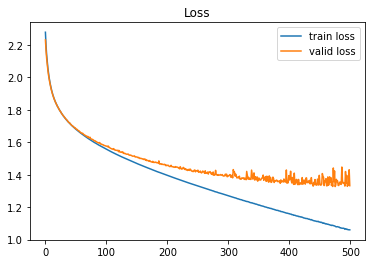

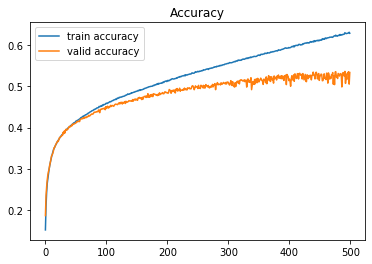

In [12]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()